In [1]:
from tabulate import tabulate
member_name = [
    ["AN HENGHENG", "Male", "I3-AMS", "e20211125"],
    ["HUON SITHAI", "Male", "I3-AMS",   "e20210954"],
    ["BUN RATNATEPY", "Female", "I3-AMS", "e20210320"],
    ["KANG PENGKHEANG", "Male", "I3-AMS", "e20210527"],
]
member_info = ["Name", "Gender", "Program", "ID"]
print("Group 3:")
print(tabulate(member_name, headers=member_info, tablefmt="fancy_grid"))

Group 3:
╒═════════════════╤══════════╤═══════════╤═══════════╕
│ Name            │ Gender   │ Program   │ ID        │
╞═════════════════╪══════════╪═══════════╪═══════════╡
│ AN HENGHENG     │ Male     │ I3-AMS    │ e20211125 │
├─────────────────┼──────────┼───────────┼───────────┤
│ HUON SITHAI     │ Male     │ I3-AMS    │ e20210954 │
├─────────────────┼──────────┼───────────┼───────────┤
│ BUN RATNATEPY   │ Female   │ I3-AMS    │ e20210320 │
├─────────────────┼──────────┼───────────┼───────────┤
│ KANG PENGKHEANG │ Male     │ I3-AMS    │ e20210527 │
╘═════════════════╧══════════╧═══════════╧═══════════╛


# Object:Mini Project No. 1
With your team, collect your own dataset which consists at least two features and one target variable. Build a linear regression model to predict the target variable. Split your dataset into training set (80%) and testing set (20%). Present your model to the class next week!

## 1.Data Understanding

1. <b>Hours Studied:</b>The amount of time a student spends studying for an exam or learning in general, often measeured in hours per day or week.
2. <b>Previous Scores:</b> The student's performance on a similar exam or assessment in the past. 
3. <b>Extracurricular Activities:</b> Activities a student participates in outsize of their regular academic studies, such as sports, clubs, hobbies, or voluntary work.
4. <b>Sleep Hour:</b> The number of hours of sleep a studet gets per night.
5. <b>Sample Question Papers Practiced:</b> Refers to practice tests or sample questions a student uses to prepare for the actual exam.
6. <b>Performance Index:</b> The student's performance score.

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Loading the dataset

data = pd.read_csv("Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


## 2. Data Cleaning

In [4]:
# Check the rows and columns of the dataset

data.shape

(10000, 6)

In [5]:
# Checking the missing value in the dataset

data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
# The data-tpye of each features of the dataset

data.dtypes

Hours Studied                        int64
Previous Scores                      int64
Extracurricular Activities          object
Sleep Hours                          int64
Sample Question Papers Practiced     int64
Performance Index                    int64
dtype: object

In [7]:
# Show the information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [8]:
# Checking the duplicated data

data[data.duplicated]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48
1477,7,61,Yes,6,8,54
1601,5,99,No,7,5,89
1786,2,62,Yes,9,4,40
2026,5,87,Yes,6,7,74
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71
9940,8,95,No,5,2,90
9954,6,97,No,8,7,92
9966,1,41,No,7,3,12


In [9]:
# Drop the duplicate data

data1 = data.drop_duplicates()

In [10]:
data1.shape

(9873, 6)

In [11]:
# Convert EA to dummy variable

student_mapping = {'Yes':1.0, 'No':0.0}
data1['Extracurricular Activities'] = data1['Extracurricular Activities'].map(student_mapping)

C:\Users\TRC\AppData\Local\Temp\ipykernel_9904\1875552063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Extracurricular Activities'] = data1['Extracurricular Activities'].map(student_mapping)


In [12]:
data1.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1.0,9,1,91
1,4,82,0.0,4,2,65
2,8,51,1.0,7,2,45
3,5,52,1.0,5,2,36
4,7,75,0.0,8,5,66


## 3. Data Training

In [13]:
# Convert data to numpy

data2 = data1.to_numpy()
data2

array([[ 7., 99.,  1.,  9.,  1., 91.],
       [ 4., 82.,  0.,  4.,  2., 65.],
       [ 8., 51.,  1.,  7.,  2., 45.],
       ...,
       [ 6., 83.,  1.,  8.,  5., 74.],
       [ 9., 97.,  1.,  7.,  0., 95.],
       [ 7., 74.,  0.,  8.,  1., 64.]])

In [14]:
# Split ratio (80% for training, 20% for testing)

# Assuming x1, x2, x3, x4, x5, and y are your datasets
x1 = data2[:, 0]
x2 = data2[:, 1]
x3 = data2[:, 2]
x4 = data2[:, 3]
x5 = data2[:, 4]
y = data2[:, 5]

# Combine x1, x2, x3, x4, and x5 into a list of tuples
combined_data = list(zip(x1, x2, x3, x4, x5, y))  #  for transposing a list of iterables. 

# Shuffle the combined data
random.shuffle(combined_data) # When you call random.shuffle(combined_data), the elements of combined_data will be rearranged randomly. 
                                # After the shuffle operation, combined_data will contain the same elements as before, but in a different order.

# Determine the split indices
split_index = int(0.8 * len(combined_data))

# Split the data into training and testing datasets
train_data = combined_data[:split_index]
test_data = combined_data[split_index:]

# Separate the datasets back into individual variables
train_x1, train_x2, train_x3, train_x4, train_x5, train_y = zip(*train_data)
test_x1, test_x2, test_x3, test_x4, test_x5, test_y = zip(*test_data)

# Convert lists to numpy arrays
train_x1 = np.array(train_x1)
train_x2 = np.array(train_x2)
train_x3 = np.array(train_x3)
train_x4 = np.array(train_x4)
train_x5 = np.array(train_x5)
train_y = np.array(train_y)

test_x1 = np.array(test_x1)
test_x2 = np.array(test_x2)
test_x3 = np.array(test_x3)
test_x4 = np.array(test_x4)
test_x5 = np.array(test_x5)
test_y = np.array(test_y)

# Print the split data (optional)
print("Training data:")
print("x1:", train_x1)
print("x2:", train_x2)
print("x3:", train_x3)
print("x4:", train_x4)
print("x5:", train_x5)
print("y:", train_y)

print("\nTesting data:")
print("x1:", test_x1)
print("x2:", test_x2)
print("x3:", test_x3)
print("x4:", test_x4)
print("x5:", test_x5)
print("y:", test_y)

Training data:
x1: [7. 6. 8. ... 5. 6. 7.]
x2: [46. 90. 99. ... 56. 71. 99.]
x3: [0. 1. 0. ... 0. 1. 0.]
x4: [9. 4. 4. ... 7. 4. 7.]
x5: [5. 7. 8. ... 8. 7. 0.]
y: [36. 80. 97. ... 43. 61. 89.]

Testing data:
x1: [1. 3. 5. ... 2. 4. 9.]
x2: [78. 67. 95. ... 43. 82. 53.]
x3: [0. 1. 1. ... 1. 1. 1.]
x4: [7. 8. 5. ... 6. 6. 9.]
x5: [8. 2. 6. ... 1. 4. 1.]
y: [53. 49. 81. ... 17. 65. 48.]


In [15]:
len(train_x1)

7898

In [16]:
len(test_x1)

1975

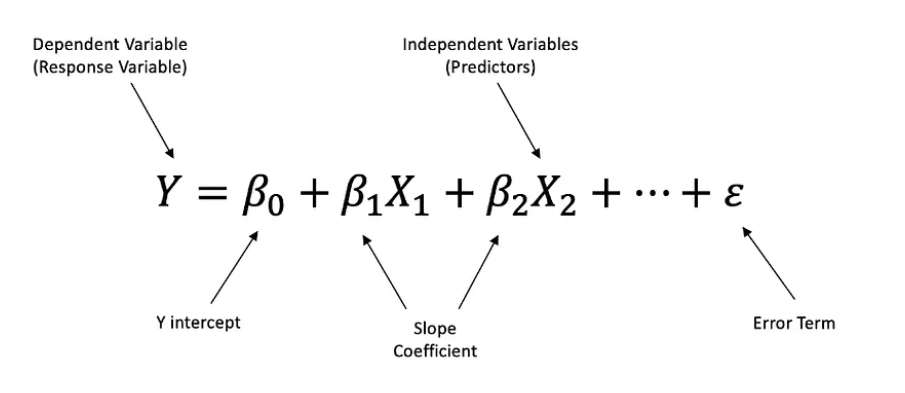

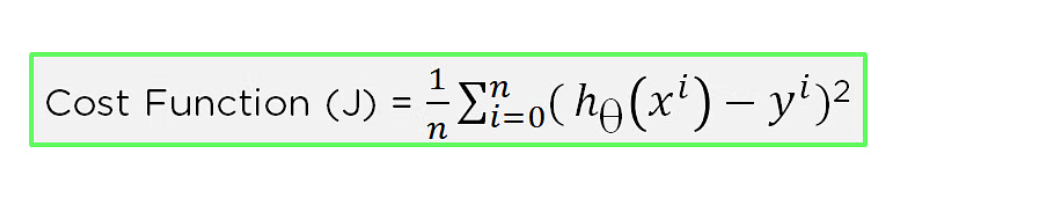

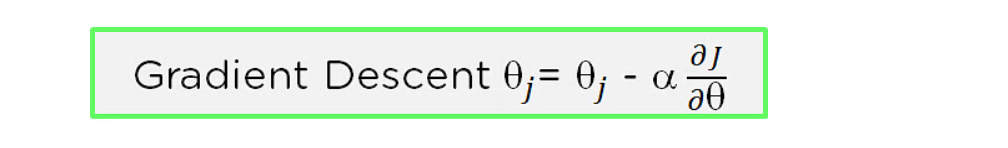

In [17]:
# Hypothesis function

def hyp(x1, x2, x3, x4, x5, a, b, c, d, e, f):
    y = a*x1 + b*x2 + c*x3 + d*x4 + e*x5 + f
    return y

In [18]:
# Cost function

def cost_func(y_predict, y_actual):
    c = (y_predict - y_actual) ** 2
    c = c.mean()
    return c

In [19]:
# Gradient a function

def grad_a(x1, y_predict, y_actual):
    g_a = (y_predict - y_actual) * x1
    g_a = 2 * g_a.mean()
    return g_a

In [20]:
# Gradient b function

def grad_b(x2, y_predict, y_actual):
    g_b = (y_predict - y_actual) * x2
    g_b = 2 * g_b.mean()
    return g_b

In [21]:
# Gradient c function

def grad_c(x3, y_predict, y_actual):
    g_c = (y_predict - y_actual) * x3
    g_c = 2 * g_c.mean()
    return g_c

In [22]:
# Gradient d function

def grad_d(x4, y_predict, y_actual):
    g_d = (y_predict - y_actual) * x4
    g_d = 2 * g_d.mean()
    return g_d

In [23]:
# Gradient e function

def grad_e(x5, y_predict, y_actual):
    g_e = (y_predict - y_actual) * x5
    g_e = 2 * g_e.mean()
    return g_e

In [24]:
# Gradient f function

def grad_f(y_predict, y_actual):
    g_f = (y_predict - y_actual)
    g_f = 2 * g_f.mean()
    return g_f

In [25]:
# Training

a, b, c, d, e, f = (10, 10, 10, 10, 10, 10)
alpha = 0.0001
num_epochs = 2000000

cost_list = []
for epoch in range(1, num_epochs+1):
    y_predict = hyp(train_x1, train_x2, train_x3, train_x4, train_x5, a, b, c, d, e, f)
    cost = cost_func(y_predict, train_y)
    cost_list.append(cost)
    
    # update weights
    a += -alpha * grad_a(train_x1, y_predict, train_y)
    b += -alpha * grad_b(train_x2, y_predict, train_y)
    c += -alpha * grad_c(train_x3, y_predict, train_y)
    d += -alpha * grad_d(train_x4, y_predict, train_y)
    e += -alpha * grad_e(train_x5, y_predict, train_y)
    f += -alpha * grad_f(y_predict, train_y)
    
    if epoch%1000 == 0:
        print(f'Epoch: {epoch:02d}: Cost = {cost:0.4f}')

Epoch: 1000: Cost = 137.4678
Epoch: 2000: Cost = 81.6992
Epoch: 3000: Cost = 74.2829
Epoch: 4000: Cost = 70.7006
Epoch: 5000: Cost = 67.9615
Epoch: 6000: Cost = 65.5496
Epoch: 7000: Cost = 63.3528
Epoch: 8000: Cost = 61.3356
Epoch: 9000: Cost = 59.4779
Epoch: 10000: Cost = 57.7641
Epoch: 11000: Cost = 56.1803
Epoch: 12000: Cost = 54.7143
Epoch: 13000: Cost = 53.3548
Epoch: 14000: Cost = 52.0919
Epoch: 15000: Cost = 50.9164
Epoch: 16000: Cost = 49.8202
Epoch: 17000: Cost = 48.7959
Epoch: 18000: Cost = 47.8368
Epoch: 19000: Cost = 46.9369
Epoch: 20000: Cost = 46.0908
Epoch: 21000: Cost = 45.2935
Epoch: 22000: Cost = 44.5407
Epoch: 23000: Cost = 43.8282
Epoch: 24000: Cost = 43.1526
Epoch: 25000: Cost = 42.5106
Epoch: 26000: Cost = 41.8991
Epoch: 27000: Cost = 41.3155
Epoch: 28000: Cost = 40.7575
Epoch: 29000: Cost = 40.2228
Epoch: 30000: Cost = 39.7095
Epoch: 31000: Cost = 39.2159
Epoch: 32000: Cost = 38.7402
Epoch: 33000: Cost = 38.2810
Epoch: 34000: Cost = 37.8371
Epoch: 35000: Cost = 3

KeyboardInterrupt: 

Text(0, 0.5, 'Cost value')

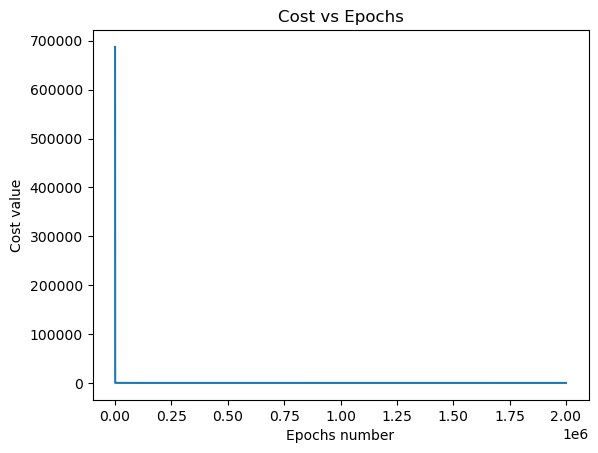

In [ ]:
# Plot cost vs epoch

plt.plot(range(1, num_epochs+1), cost_list)
plt.title('Cost vs Epochs')
plt.xlabel('Epochs number')
plt.ylabel('Cost value')

# plt.show()

In [ ]:
# Evaluate

for i in range(len(x1)): 
    print(f'Predicted: {hyp(test_x1[i], test_x2[i], test_x3[i], test_x4[i], test_x5[i], a, b, c, d, e, f):.2f}, Actual: {test_y[i]:.2f}')

Predicted: 72.16, Actual: 70.00
Predicted: 43.18, Actual: 43.00
Predicted: 51.31, Actual: 55.00
Predicted: 22.39, Actual: 23.00
Predicted: 49.55, Actual: 50.00
Predicted: 54.84, Actual: 58.00
Predicted: 25.32, Actual: 22.00
Predicted: 33.91, Actual: 34.00
Predicted: 56.03, Actual: 54.00
Predicted: 79.76, Actual: 78.00
Predicted: 61.21, Actual: 59.00
Predicted: 40.27, Actual: 38.00
Predicted: 66.69, Actual: 66.00
Predicted: 76.45, Actual: 79.00
Predicted: 86.70, Actual: 87.00
Predicted: 61.09, Actual: 59.00
Predicted: 58.12, Actual: 57.00
Predicted: 30.96, Actual: 34.00
Predicted: 90.59, Actual: 88.00
Predicted: 74.71, Actual: 75.00
Predicted: 46.78, Actual: 47.00
Predicted: 43.54, Actual: 42.00
Predicted: 56.08, Actual: 54.00
Predicted: 43.13, Actual: 43.00
Predicted: 34.83, Actual: 35.00
Predicted: 54.35, Actual: 53.00
Predicted: 44.33, Actual: 46.00
Predicted: 43.50, Actual: 41.00
Predicted: 70.52, Actual: 69.00
Predicted: 69.44, Actual: 69.00
Predicted: 29.50, Actual: 28.00
Predicte

IndexError: index 1975 is out of bounds for axis 0 with size 1975

In [ ]:
print(test_x1)

[9. 3. 5. ... 3. 6. 5.]


## Making Preditive System

In [ ]:
print('The Preditive System on students performance index')
print()

Studies_Hour = float(input('Input your studying hour: '))
Studies_Hour1 = np.array(Studies_Hour)

Previous_Score = float(input('Input your Previous score out of 100: '))
Previous_Socre1 = np.array(Previous_Score)
  
EA = float(input('Input your Extraccuricular Activities (yes = 1, No = 0):' ))
EA1 = np.array(EA)

Sleep_Hour = float(input('Input your sleeping hour: '))
Sleep_Hour1 = np.array(Sleep_Hour)

Quiz = float(input('Input your quiz score out of 10: '))
Quiz1 = np.array(Quiz)

print()
Pred_Score = hyp(Studies_Hour1, Previous_Socre1, EA1, Sleep_Hour1, Quiz1, a, b, c, d, e, f)

if (Pred_Score < 0):
    print('Your performace index is very bed.')
else:
    print('Your performance index is approximately: ', Pred_Score)

The Preditive System on students performance index

Input your studying hour: 7
Input your Previous score out of 100: 99
Input your Extraccuricular Activities (yes = 1, No = 0):1
Input your sleeping hour: 9
Input your quiz score out of 10: 1

Your performance index is approximately:  91.88027050689792
